In [6]:
import pandas as pd
http = pd.read_csv('/content/full_xss_sqli_dataset.csv')


In [7]:
http.head()

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word,Class
0,GET,/ga.js,NaN,0,0,0,0,0,0,0,0,0,0,0,good
1,GET,/favicon.ico,NaN,0,0,0,0,0,0,0,0,0,0,0,good
2,GET,/ga.js,NaN,0,0,0,0,0,0,0,0,0,0,0,good
3,GET,/ga.js,NaN,0,0,0,0,0,0,0,0,0,0,0,good
4,GET,/images/sft_approved_banners/sft_logo_medium.gif,NaN,0,0,0,0,0,0,0,0,0,0,0,good


In [8]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 130.4 MB/s eta 

In [12]:
from pycaret.classification import *

# Assuming http is your pandas DataFrame containing the dataset
classification_setup = setup(data=http,
                              target='Class',  # 'class' is the target variable
                              normalize=True,
                              numeric_features=['Single Quotes', 'Double Quotes', 'Dashes', 'Braces', 'Spaces','Tags','Colons','Backtick', 'Bad Words','XSS Check','XSS Word'],
                              ignore_features=['Method', 'Path', 'Body'])

# Compare classification models
compare_models()


,Description,Value
0,Session id,4967
1,Target,Class
2,Target type,Binary
3,Target mapping,"bad: 0, good: 1"
4,Original data shape,"(1719, 15)"
5,Transformed data shape,"(1719, 12)"
6,Transformed train set shape,"(1203, 12)"
7,Transformed test set shape,"(516, 12)"
8,Ignore features,3
9,Numeric features,11


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9917,0.9971,0.9655,0.9963,0.9805,0.9752,0.9755,0.2040
rf,Random Forest Classifier,0.9908,0.9963,0.9655,0.9923,0.9786,0.9728,0.9730,0.3330
dt,Decision Tree Classifier,0.9900,0.9905,0.9620,0.9923,0.9767,0.9704,0.9707,0.0760
gbc,Gradient Boosting Classifier,0.9900,0.9974,0.9620,0.9923,0.9767,0.9704,0.9707,0.2690
lightgbm,Light Gradient Boosting Machine,0.9900,0.9975,0.9620,0.9923,0.9767,0.9704,0.9707,0.6000
xgboost,Extreme Gradient Boosting,0.9892,0.9963,0.9581,0.9923,0.9747,0.9679,0.9682,0.1130
et,Extra Trees Classifier,0.9884,0.9964,0.9581,0.9885,0.9728,0.9654,0.9658,0.3560
knn,K Neighbors Classifier,0.9867,0.9834,0.9467,0.9923,0.9685,0.9601,0.9609,0.1270
svm,SVM - Linear Kernel,0.9809,0.0000,0.9580,0.9619,0.9580,0.9458,0.9473,0.0520
lr,Logistic Regression,0.9792,0.9937,0.9578,0.9495,0.9527,0.9394,0.9402,0.3920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=4967)

In [14]:
ada_model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9917,1.0000,0.9630,1.0000,0.9811,0.9758,0.9761
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9917,0.9947,1.0000,0.9630,0.9811,0.9758,0.9761
3,0.9917,1.0000,0.9615,1.0000,0.9804,0.9751,0.9754
4,0.9917,0.9971,0.9615,1.0000,0.9804,0.9751,0.9754
5,0.9917,0.9992,0.9615,1.0000,0.9804,0.9751,0.9754
6,0.9917,0.9859,0.9615,1.0000,0.9804,0.9751,0.9754
7,0.9833,0.9967,0.9231,1.0000,0.9600,0.9495,0.9507
8,0.9917,0.9984,0.9615,1.0000,0.9804,0.9751,0.9754


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

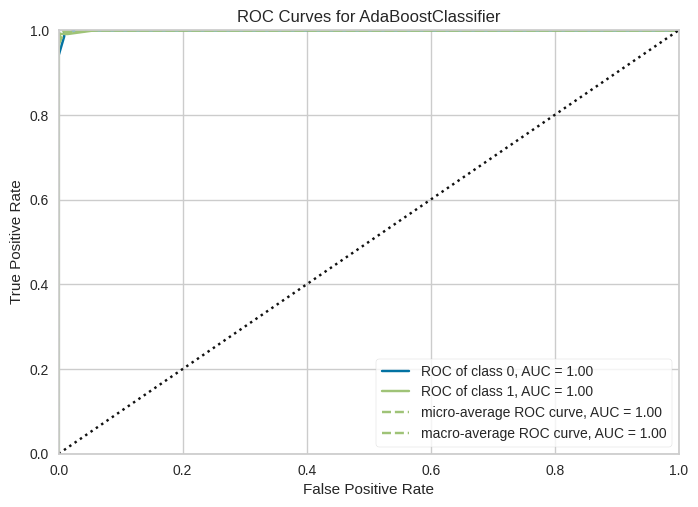

In [15]:
plot_model(ada_model)

In [16]:
test = pd.read_csv('/content/trial_model2.csv')
test.head()

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word
0,GET,/DVWA/,NaN,0,0,0,0,0,0,0,0,0,0,0
1,GET,/dvwa/js/add_event_listeners.js,NaN,0,0,0,0,0,0,0,0,0,0,0
2,GET,/DVWA/instructions.php,NaN,0,0,0,0,0,0,0,0,0,0,0
3,GET,/dvwa/js/add_event_listeners.js,NaN,0,0,0,0,0,0,0,0,0,0,0
4,GET,/DVWA/setup.php,NaN,0,0,0,0,0,0,0,0,0,0,0


In [17]:
test_result = predict_model(ada_model,data = test)


In [18]:
test_result

,Method,Path,Body,Single Quotes,Double Quotes,Dashes,Braces,Spaces,Tags,Colons,Backtick,Bad Words,XSS Check,XSS Word,prediction_label,prediction_score
0,GET,/DVWA/,NaN,0,0,0,0,0,0,0,0,0,0,0,good,0.6427
1,GET,/dvwa/js/add_event_listeners.js,NaN,0,0,0,0,0,0,0,0,0,0,0,good,0.6427
2,GET,/DVWA/instructions.php,NaN,0,0,0,0,0,0,0,0,0,0,0,good,0.6427
3,GET,/dvwa/js/add_event_listeners.js,NaN,0,0,0,0,0,0,0,0,0,0,0,good,0.6427
4,GET,/DVWA/setup.php,NaN,0,0,0,0,0,0,0,0,0,0,0,good,0.6427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,GET,/DVWA/vulnerabilities/sqli/,NaN,0,0,0,0,0,0,0,0,0,0,0,good,0.6427
57,GET,/DVWA/vulnerabilities/sqli/?id=%27+UNION+SELEC...,NaN,1,0,1,0,0,0,0,0,3,0,0,bad,0.8576
58,GET,/DVWA/security.php,NaN,0,0,0,0,0,0,0,0,0,0,0,good,0.6427
59,GET,/dvwa/js/add_event_listeners.js,NaN,0,0,0,0,0,0,0,0,0,0,0,good,0.6427


In [20]:
evaluate_model(ada_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
model1 = finalize_model(ada_model)

In [22]:
save_model(model1,'model2_grindwall')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Single Quotes', 'Double Quotes',
                                              'Dashes', 'Braces', 'Spaces',
                                              'Tags', 'Colons', 'Backtick',
                                              'Bad Words', 'XSS Check',
                                              'XSS Word'],
                                     transformer=...
                                     transformer=StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True))),
                

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 143.8 MB/s eta 0

In [ ]:
import re
import pandas as pd
from pycaret.classification import *
path = 'http://192.168.0.110/DVWA'
body = ''
method = 'GET'
bad_words = ['sleep', 'drop', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'delete', 'group by', 'insert', 'or']
single_quotes = path.count("'") + body.count("'")
double_quotes = path.count('"') + body.count('"')
dashes = path.count('--') + body.count('--')
braces = path.count('{') + path.count('}') + path.count('(') + body.count('{') + body.count('}') + body.count('(')
spaces = path.count(' ') + body.count(" ")
bad_words_count = sum(1 for word in bad_words if re.search(r'\b' + re.escape(word) + r'\b', path, re.IGNORECASE))
datas = [method,path,body,single_quotes,double_quotes,dashes,braces,spaces,bad_words_count]
input = pd.DataFrame([datas], columns=['Method','Path','Body','Single_q', 'Double_q', 'Dashes', 'Braces', 'Spaces', 'Bad_Words'])
print(input)

model = load_model()


  Method                       Path Body  Single_q  Double_q  Dashes  Braces  \
0    GET  http://192.168.0.110/DVWA              0         0       0       0   

   Spaces  Bad_Words  
0       0          0  


In [ ]:
import os
import xml.etree.ElementTree as ET
import csv
import argparse
import base64
import re
from urllib import parse
# Define a list of SQL keywords to check against
bad_words = ['sleep', 'drop', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'delete', 'group by', 'insert', 'id']
xss = ['script','img','a','javascript','svg']
def analyze_request_content(path,body):

    path = parse.unquote(path)
    single_quotes = path.count("'") + body.count("'")
    double_quotes = path.count('"') + body.count('"')
    dashes = path.count('--') + body.count('--')
    braces = path.count('{') + path.count('}') + path.count('(') + body.count('{') + body.count('}') + body.count('(')
    spaces = path.count(' ') + body.count(" ")
    tags = path.count('<') + path.count('>')+ body.count('<')+body.count('>')
    colons = path.count(';')+body.count(';')
    bad_words_count1 = sum(1 for word in bad_words if re.search(r'\b' + re.escape(word) + r'\b', path, re.IGNORECASE))
    bad_words_count2 = sum(1 for word in bad_words if re.search(r'\b' + re.escape(word) + r'\b', body, re.IGNORECASE))
    xss_count1 = sum(1 for word in xss if re.search(r'\b' + re.escape(word) + r'\b', path, re.IGNORECASE))
    xss_count2 = sum(1 for word in xss if re.search(r'\b' + re.escape(word) + r'\b', body, re.IGNORECASE))
    bad_words_count = bad_words_count1+ bad_words_count2
    xss_count = xss_count1+xss_count2

    return single_quotes, double_quotes, dashes, braces, spaces,tags,colons, bad_words_count,xss_count

def parse_xml_to_csv(xml_file_path, csv_file_path):
    # Create a CSV file and write header
    csv_header = ['Method', 'Path', 'Body', 'Single Quotes', 'Double Quotes', 'Dashes', 'Braces', 'Spaces','Tags','Colons', 'Bad Words','XSS']

    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(csv_header)

        # Parse the XML file
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        # Loop through each <item> element
        for item in root.findall('./item'):
            method = item.find('./method').text
            path = item.find('./path').text
            request_enc = item.find('./request').text.strip()
            request_content = base64.b64decode(request_enc).decode('utf-8')

            if method == "POST":
                try:
                    body_start = request_content.index('\r\n\r\n') + 4
                    body = request_content[body_start:]
                except ValueError:
                    body = ""
            else:
                body = ""

            # Analyze the request content
            single_quotes, double_quotes, dashes, braces, spaces,tags,colons, bad_words_count,xss_count = analyze_request_content(path,body)

            # Write data to CSV file
            csv_writer.writerow([method, path, body, single_quotes, double_quotes, dashes, braces, spaces,tags,colons, bad_words_count,xss_count])

    print("CSV file created:", csv_file_path)

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Parse XML log file and create CSV dataset.")
    parser.add_argument("--x", required=True, help="Path to the XML log file")
    parser.add_argument("--c", default=None, help="Path to the output CSV file")

    args = parser.parse_args()

    if args.c is None:
        # Determine the CSV filename based on the XML filename
        xml_filename = os.path.basename(args.x)
        csv_filename = xml_filename.replace('.xml', '.csv')

        # Construct the full path to the CSV file
        args.c = os.path.join("csvFiles", csv_filename)

    parse_xml_to_csv(args.x, args.c)
